In [1]:
from large_gcs.contact.contact_location import *
from large_gcs.contact.contact_pair_mode import *
from large_gcs.contact.rigid_body import *
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.algorithms.gcs_astar_subopt import GcsAstarSubOpt
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_over,
)
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from IPython.display import HTML


np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})

In [4]:
base_filename = "contact_graph_triangle_challenge_full"
base_filename = "cg_trichal2_full"
# base_filename = "cg_trichal3_full"
base_filename = "cg_maze_a1_full"
base_filename = "cg_maze_a2"

method_modifier = "gcs_astar_subopt_shortestedges_obj_weighted"
# file_name = "contact_graph_triangle_challenge_sol_only.npy"
graph_file = os.path.join(
    os.environ["PROJECT_ROOT"], "large_gcs", "example_graphs", base_filename + ".npy"
)

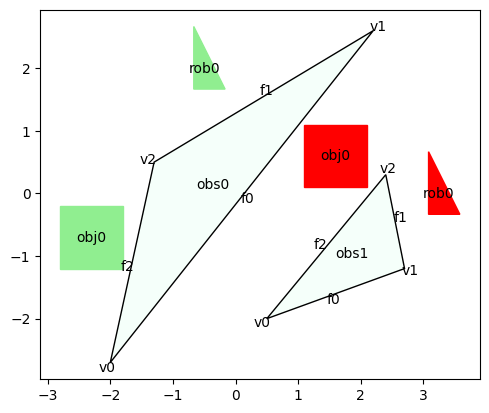

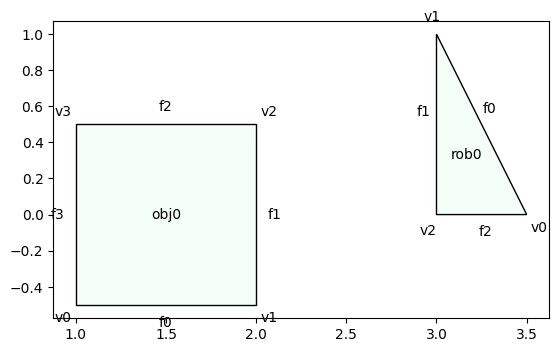

In [10]:
# obs_vertices = [[[-1, 2], [-1, -1], [2, 2]]]
# obj_vertices = [[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]]
# rob_vertices = [[[3, 1], [3, 0], [3.5, 0]]]

# # 3 items triangle challenge 2
# source_obj_pos = [[3.25, 0]]
# source_rob_pos = [[1.5, 0.5]]
# target_obj_pos = [[-1.5, 0]]
# target_rob_pos = [[-3, 0]]
# # 3 items triangle challenge 3
# source_obj_pos = [[3.25, 0]]
# source_rob_pos = [[-3, 0]]
# target_obj_pos = [[-1.5, 0]]
# target_rob_pos = [[1.5, 0.5]]

# maze_a1
obs_vertices = [
    [[-2, -2.7], [2.2, 2.6], [-1.3, 0.5]],
    [[0.5, -2], [2.7, -1.2], [2.4, 0.3]],
]
obj_vertices = [[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]]
rob_vertices = [[[3, 1], [3, 0], [3.5, 0]]]
source_obj_pos = [[3.25, 0]]
source_rob_pos = [[1.5, 0.6]]
target_obj_pos = [[-2.3, -0.7]]
target_rob_pos = [[-0.5, 2]]

# maze_a2
source_obj_pos = [[1.6, 0.6]]
source_rob_pos = [[3.25, 0]]

obs = []
objs = []
robs = []
n_pos_per_set = 2
for i in range(len(obs_vertices)):
    obs.append(
        RigidBody(
            name=f"obs{i}",
            geometry=Polyhedron.from_vertices(obs_vertices[i]),
            mobility_type=MobilityType.STATIC,
            n_pos_points=n_pos_per_set,
        )
    )
for i in range(len(obj_vertices)):
    objs.append(
        RigidBody(
            name=f"obj{i}",
            geometry=Polyhedron.from_vertices(obj_vertices[i]),
            mobility_type=MobilityType.UNACTUATED,
            n_pos_points=n_pos_per_set,
        )
    )
for i in range(len(rob_vertices)):
    robs.append(
        RigidBody(
            name=f"rob{i}",
            geometry=Polyhedron.from_vertices(rob_vertices[i]),
            mobility_type=MobilityType.ACTUATED,
            n_pos_points=n_pos_per_set,
        )
    )
all_rigid_bodies = obs + objs + robs

# for rigid_body in all_rigid_bodies:
#     rigid_body.plot()
for static_body in obs:
    static_body.plot()
for movable_body, source_pos in zip(objs + robs, source_obj_pos + source_rob_pos):
    movable_body.plot_at_position(source_pos, color="red")
for movable_body, target_pos in zip(objs + robs, target_obj_pos + target_rob_pos):
    movable_body.plot_at_position(target_pos, color="lightgreen")
plt.gca().set_aspect("equal")
plt.show()
robs[0].plot()
# obs[0].plot()
# obs[1].plot()
objs[0].plot()
plt.show()

In [6]:
ws_x = 4
ws_y = 3
vertex_inclusion = [
    "source",
    "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f1-rob0_f1')",
    "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')",
    "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')",
    "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')",
    "('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')",
    "('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f0-rob0_v1')",
    "('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f3-rob0_v0')",
    "target",
]
contact_graph = ContactGraph(
    obs,
    objs,
    robs,
    source_obj_pos,
    source_rob_pos,
    target_obj_pos,
    target_rob_pos,
    workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
    vertex_exclusion=None,
    vertex_inclusion=None,
)

print(contact_graph.params)
# Serialize and save to disk
contact_graph.save_to_file(graph_file)

Generating contact sets for 4 bodies...
Generating contact pair modes for 5 body pairs...


  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 52.08it/s]

Each body pair has on average 7.0 modes


Generating contact sets for 8100 sets...


100%|██████████| 8100/8100 [01:39<00:00, 81.56it/s]


Pruning empty sets...


100%|██████████| 8100/8100 [01:02<00:00, 130.34it/s]


1234 sets remain after removing 6866 empty sets
Adding 1236 vertices to graph...


100%|██████████| 1236/1236 [00:00<00:00, 7180.08it/s]

Generating edges...(parallel)



100%|██████████| 763230/763230 [21:05<00:00, 603.00it/s]


98676 edges generated
Adding 98676 edges to graph...


100%|██████████| 98676/98676 [00:24<00:00, 4101.54it/s]


GraphParams(dim_bounds=(4, 18), n_vertices=1236, n_edges=98676, source=[[1.6, 0.6], [3.25, 0]], target=[[-2.3, -0.7], [-0.5, 2]], workspace=[[-4, 4], [-3, 3]], default_costs_constraints=None)


In [7]:
contact_graph.incoming_edges("target")

[Edge(u="('NC|obs0_f2-obj0_v1', 'NC|obs0_f1-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f1-rob0_f1')", v='target', costs=[<pydrake.solvers.LinearCost object at 0x179cf8d70>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x18aa10d70>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x18cbc13b0>),
 Edge(u="('NC|obs0_f2-obj0_v1', 'NC|obs0_f1-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f2-rob0_f2')", v='target', costs=[<pydrake.solvers.LinearCost object at 0x179d0ba30>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x18aa131b0>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x18cbc8370>)]

In [8]:
contact_graph.outgoing_edges("source")

[Edge(u='source', v="('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f1-rob0_v2', 'NC|obj0_f1-rob0_f1')", costs=[<pydrake.solvers.LinearCost object at 0x179689c30>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x18a294eb0>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x18b9190f0>)]

In [ ]:
cg = ContactGraph.load_from_file(graph_file)
print(cg.params)

In [ ]:
# gcs_astar = GcsAstar(cg, use_convex_relaxation=False,
#                      shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over)
# sol = gcs_astar.run(verbose=True, animate=False)

In [ ]:
gcs_astar_subopt = GcsAstarSubOpt(
    cg,
    use_convex_relaxation=False,
    shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over,
)
sol = gcs_astar_subopt.run(verbose=True, animate=False)

In [ ]:
output_dir = os.path.join(os.environ["PROJECT_ROOT"], "output", "contact")
vid_file = os.path.join(output_dir, f"{method_modifier}_{base_filename}.mp4")
graphviz_file = os.path.join(output_dir, f"{method_modifier}_{base_filename}")

In [ ]:
gviz = gcs_astar_subopt._visited.graphviz()
gviz

In [ ]:
gviz.render(graphviz_file, view=False)

In [ ]:
cg._post_solve(sol)
anim = cg.animate_solution()
HTML(anim.to_html5_video())

In [ ]:
anim.save(vid_file)